In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,same_state,age,des_len,python_yn,R_yn,spark_yn,aws_yn,excel_yn,tableau_yn,comp_count
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,0,48,2555,1,0,0,0,1,1,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,0,37,4828,1,0,0,0,0,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,1,11,3495,1,1,1,0,1,0,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,1,56,3926,1,0,0,0,0,0,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,1,23,2748,1,0,0,0,1,0,3


In [4]:
#Pandas Profiling
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

In [5]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'des_len',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'tableau_yn',
       'comp_count'],
      dtype='object')

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.job_simp.value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
machine learning     22
manager              22
director             14
Name: job_simp, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,des_len,python_yn,R_yn,spark_yn,aws_yn,excel_yn,tableau_yn,comp_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,3910.172507,0.528302,0.036388,0.225067,0.237197,0.522911,0.199461,1.053908
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,1533.827777,0.499535,0.187380,0.417908,0.425651,0.499812,0.399865,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,2834.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,3781.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,4772.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,10146.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'des_len',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'tableau_yn',
       'comp_count', 'job_simp', 'seniority'],
      dtype='object')

<AxesSubplot:>

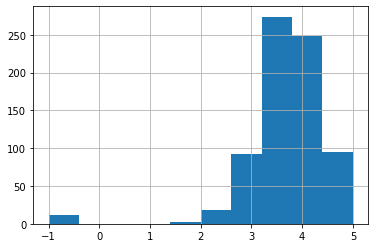

In [12]:
df.Rating.hist()

<AxesSubplot:>

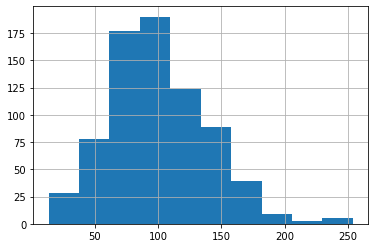

In [13]:
df.avg_salary.hist()

<AxesSubplot:>

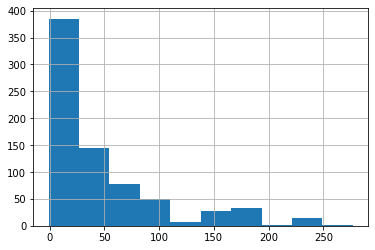

In [14]:
df.age.hist()

<AxesSubplot:>

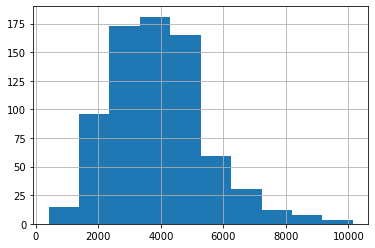

In [15]:
df.des_len.hist()

<AxesSubplot:>

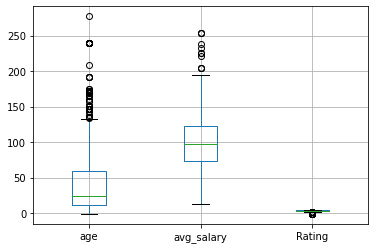

In [16]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

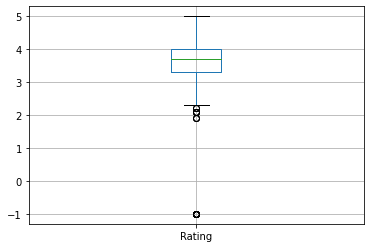

In [17]:
df.boxplot(column = 'Rating')

In [18]:
df[['age','avg_salary','Rating','des_len']].corr()

,age,avg_salary,Rating,des_len
age,1.000000,0.019574,0.023162,0.165361
avg_salary,0.019574,1.000000,0.013492,0.078093
Rating,0.023162,0.013492,1.000000,-0.012631
des_len,0.165361,0.078093,-0.012631,1.000000


In [19]:
mask = np.triu(np.ones_like(df[['age','avg_salary','Rating','des_len','comp_count']].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<AxesSubplot:>

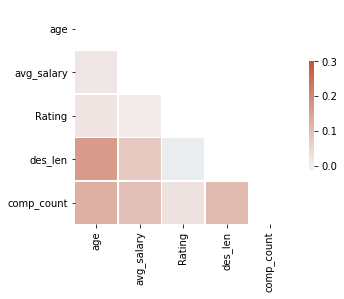

In [20]:
sns.heatmap(df[['age','avg_salary','Rating','des_len','comp_count']].corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'des_len',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'tableau_yn',
       'comp_count', 'job_simp', 'seniority'],
      dtype='object')

In [22]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'job_state', 'same_state', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'tableau_yn',
       'comp_count', 'job_simp', 'seniority']]

In [23]:
# df_cat = sns.load_dataset("df_cat")
##for i in df_cat.columns:
    ##cat_num = df_cat[i].value_counts()
   # print("graph for %s: total = %d" % (i, len(cat_num)))
   # chart = sns.barplot(x=cat_num.index, y=cat_num)
   # chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    #plt.show()

In [24]:
df_cat = df[['Size', 'Type of ownership', 'Sector', 'Revenue', 'job_state', 'comp_count', 'job_simp']]

graph for Size: total = 9


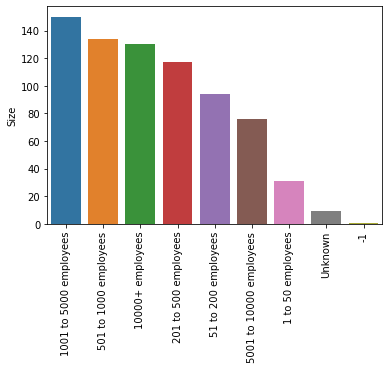

graph for Type of ownership: total = 11


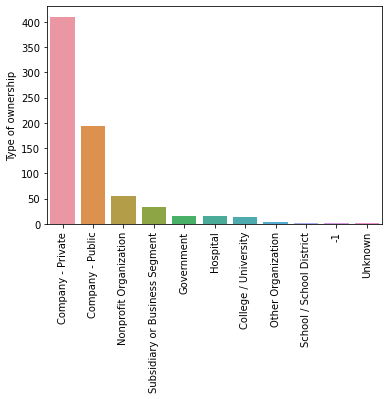

graph for Sector: total = 20


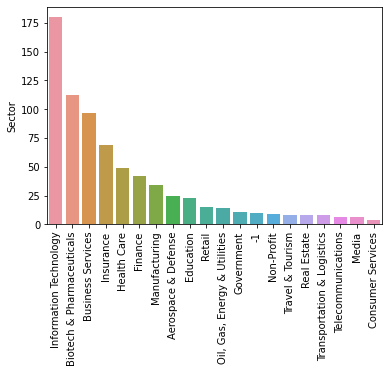

graph for Revenue: total = 14


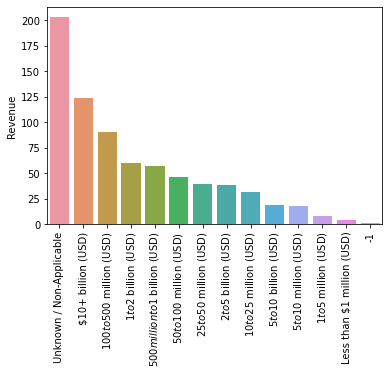

graph for job_state: total = 20


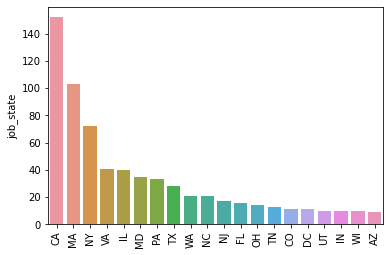

graph for comp_count: total = 5


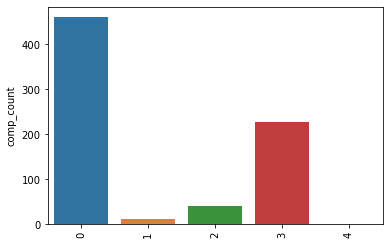

graph for job_simp: total = 7


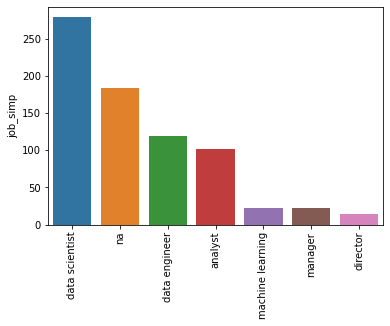

In [25]:
# df_cat = sns.load_dataset("df_cat")
for i in df_cat[['Size', 'Type of ownership', 'Sector', 'Revenue', 'job_state', 'comp_count', 'job_simp']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [26]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'des_len',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'tableau_yn',
       'comp_count', 'job_simp', 'seniority'],
      dtype='object')

In [27]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
na,84.853261


In [28]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp         seniority            
analyst          jr          56.500000
                 na          61.155405
                 senior      79.092593
data engineer    na          96.701220
                 senior     124.689189
data scientist   jr         106.500000
                 na         107.043011
                 senior     138.956522
director         na         168.607143
machine learning na         119.133333
                 senior     142.071429
manager          na          84.022727
na               na          73.988189
                 senior     109.061404

In [29]:
pd.set_option('display.max_rows', None)

In [30]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                    
WI        na                         4
          data scientist             3
          analyst                    3
WA        na                         1
          data scientist            17
          analyst                    3
VA        na                         5
          machine learning           2
          data scientist            18
          data engineer             10
          analyst                    6
UT        data engineer              3
          analyst                    4
          data scientist             3
TX        na                         7
          data scientist            13
          data engineer              8
TN        data scientist             1
          data engineer             10
          analyst                    2
SC        na                         1
RI        analyst                    1
PA        machine learning           7
          data engineer              1
          data scientist             6
          analyst                    8
          manager                    3
          na                         8
OR        data scientist             3
          data engineer              1
OH        na                         3
          data scientist             7
          analyst                    4
NY        na                        12
          machine learning           2
          data scientist            40
          data engineer              4
          analyst                   14
NM        data scientist             3
NJ        data scientist             4
          analyst                    6
          data engineer              2
          manager                    2
          director                   2
          na                         1
NE        na                         4
NC        na                        12
          data scientist             3
          data engineer              6
MO        na                         3
          manager                    1
          data scientist             3
          analyst                    2
MN        data engineer              1
          analyst                    1
MI        manager                    2
          data scientist             4
MD        na                        16
          data scientist            13
          data engineer              3
          analyst                    3
MA        na                        46
          manager                    5
          director                   6
          data scientist            30
          data engineer             12
          analyst                    4
LA        analyst                    1
          data engineer              2
          na                         1
KY        na                         4
          data scientist             2
KS        machine learning           3
IN        na                         4
          data scientist             2
          data engineer              4
IL        analyst                    3
          na                         6
          machine learning           2
          director                   6
          data scientist            15
          data engineer              8
ID        analyst                    2
IA        analyst                    2
          data engineer              3
GA        data scientist             3
          na                         3
FL        data scientist             7
          data engineer              3
          analyst                    6
DE        na                         6
DC        data scientist             5
          data engineer              4
          analyst                    2
CT        na                         3
          data scientist             2
CO        machine learning           1
          data engineer              3
          analyst                    1
          na                         3
          data scientist             3
CA        n

In [31]:
pd.pivot_table(df[df.job_simp =='data scientist'], index = ['job_state'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [32]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'des_len',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'tableau_yn',
       'comp_count', 'job_simp', 'seniority'],
      dtype='object')

In [33]:
#rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, tableau, des_len, Type of ownership

In [34]:
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue', 'comp_count', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'tableau_yn', 'Type of ownership', 'avg_salary']]

In [35]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [36]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [37]:
#installing cloudwork nltk
#import nltk
#nltk.download()

In [38]:
from workcloud import Wordcloud, ImageCOlorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'workcloud'

In [39]:
words = "".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = "".join([ele for ele in words_filtered])

wc = WordCloud(background_color = "white", random_state = 1, stopwords=STOPWORDS, max_words=2000, width=800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show

NameError: name 'stopwords' is not defined